### Installing libraries

In [13]:
import threading
import time
import psutil
import numpy as np


### Constant Matrix

In [14]:
constant_matrix = np.full((1000, 1000), 5)
print(constant_matrix)
     

[[5 5 5 ... 5 5 5]
 [5 5 5 ... 5 5 5]
 [5 5 5 ... 5 5 5]
 ...
 [5 5 5 ... 5 5 5]
 [5 5 5 ... 5 5 5]
 [5 5 5 ... 5 5 5]]


### 100 Random Matrices

In [15]:
random_matrices = []
for i in range(100):
    matrix = np.random.randint(1, 10, size=(1000, 1000))
    random_matrices.append(matrix)
     

### Matrix Multiplication (Task function)

In [16]:
def task(const , rand , start_idx, end_idx ):
    ans = const
    for i in range(start_idx, end_idx):
        ans = np.dot(ans, rand[i])
    return ans


In [17]:
def cpu_utilization():
    return psutil.cpu_percent()

### Multithreading

In [18]:
def run_threads(num_threads):
    activeThreads = threading.activeCount()
    threads = []
    matrices_per_thread = 100 // num_threads
    remaining_matrices = 100 % num_threads

    start_idx = 0

    
    startTime = time.time()  
    print(f"\nRunning {num_threads} threads...")

    for i in range(num_threads):
        end_idx = start_idx + matrices_per_thread
        if i < remaining_matrices:
            end_idx += 1
            
        t = threading.Thread(target=task, args=(constant_matrix, random_matrices,start_idx, end_idx))
        threads.append(t)
        t.start()
        start_idx = end_idx

    # Compute average CPU utilization
    cpu_utilizations = []
    for t in threads:
        t.join()  # Wait for thread to finish
        cpu_utilizations.append(cpu_utilization())
        
    total_time = time.time() - startTime
    avg_cpu_utilization = sum(cpu_utilizations) / len(cpu_utilizations)
    print(f"Average CPU Utilization for {num_threads} threads: {avg_cpu_utilization:.2f}%")
    print(f"Total Time Taken for {num_threads} threads: {total_time}")
    

    return total_time , avg_cpu_utilization


### Main program

In [19]:
total_time = []
avg_cpu_utilizations = []

for num_threads in range(1, 11):  # Increase number of threads from 1 to 10
    tt , avg = run_threads(num_threads)
    total_time.append(tt)
    avg_cpu_utilizations.append(avg)


C:\Users\tarus\AppData\Local\Temp\ipykernel_14472\1019262814.py:2: DeprecationWarning: activeCount() is deprecated, use active_count() instead
  activeThreads = threading.activeCount()



Running 1 threads...
Average CPU Utilization for 1 threads: 9.40%
Total Time Taken for 1 threads: 106.08964538574219

Running 2 threads...
Average CPU Utilization for 2 threads: 18.75%
Total Time Taken for 2 threads: 92.78594279289246

Running 3 threads...
Average CPU Utilization for 3 threads: 12.13%
Total Time Taken for 3 threads: 55.905330419540405

Running 4 threads...
Average CPU Utilization for 4 threads: 14.40%
Total Time Taken for 4 threads: 50.29906630516052

Running 5 threads...
Average CPU Utilization for 5 threads: 21.48%
Total Time Taken for 5 threads: 39.24222135543823

Running 6 threads...
Average CPU Utilization for 6 threads: 11.45%
Total Time Taken for 6 threads: 35.78126001358032

Running 7 threads...
Average CPU Utilization for 7 threads: 10.10%
Total Time Taken for 7 threads: 38.566537380218506

Running 8 threads...
Average CPU Utilization for 8 threads: 14.84%
Total Time Taken for 8 threads: 39.34868669509888

Running 9 threads...
Average CPU Utilization for 9 th

In [20]:
num_threads = list(range(1, len(total_time) + 1))
print(num_threads)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


### Output Graph

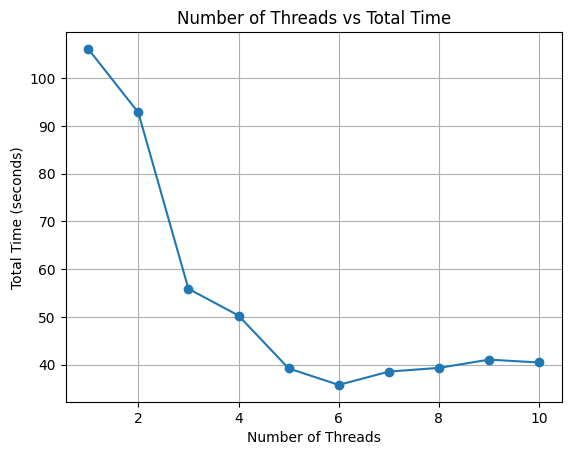

In [24]:
import matplotlib.pyplot as plt
plt.plot(num_threads, total_time, marker='o')
plt.title('Number of Threads vs Total Time')
plt.xlabel('Number of Threads')
plt.ylabel('Total Time (seconds)')
plt.grid(True)
plt.show()

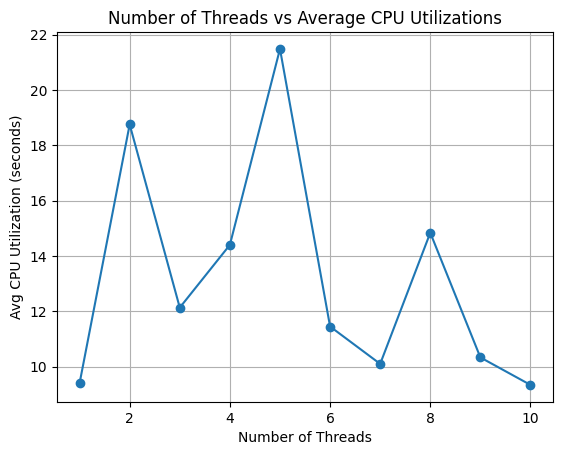

In [23]:
import matplotlib.pyplot as plt
plt.plot(num_threads, avg_cpu_utilizations , marker='o')
plt.title('Number of Threads vs Average CPU Utilizations')
plt.xlabel('Number of Threads')
plt.ylabel('Avg CPU Utilization (seconds)')
plt.grid(True)
plt.show()